In [1]:
# # Packages to locally download data into the notebook:
# import requests
# import zipfile
import glob

#Numpy
import numpy as np

#For image plotting
import skimage.io

#Matplotlib plotting packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

#scipy
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

# For loading bars
from tqdm.notebook import tqdm as tqdm

import pandas as pd

In [2]:
file_path = '../../data/mot-cal/'
file_name = 'Schief2003PNAS_AllFig'
file_type = '.csv'
comment = '%'

schief_df = pd.read_csv(file_path + file_name + file_type, comment=comment)
schief_df

,Unnamed: 0,ATP (uM),ADP (uM),P (uM),Speed (nm/s),fig,color
0,0,19385.626151,0.000000,0.0,863.551193,2,k
1,1,9786.773883,0.000000,0.0,914.573970,2,k
2,2,2904.223563,0.000000,0.0,968.611419,2,k
3,3,2905.445193,0.000000,0.0,897.239919,2,k
4,4,2906.361753,0.000000,0.0,847.184184,2,k
...,...,...,...,...,...,...,...
127,2,3000.000000,1000.000000,0.0,609.378966,4B,r
128,3,3000.000000,1000.000000,0.0,593.790767,4B,r
129,4,3000.000000,1990.291262,0.0,545.725654,4B,r
130,5,3000.000000,1990.291262,0.0,520.084665,4B,r


In [3]:
#Define Schief Parameters
kcat00 = 113.2 #s^-1 Maximum ATPase rate
KM00 = 28.1 #uM Michaelis Constant
KiP = 9000 #uM Pi competitive
KiiP = 200000 #uM Pi noncomptetitive
KiADP = 34.6 #uM ADP competitive
KiiADP = 23000 #uM ADP noncompetitive
KiADPP = 95000 #uM^2 Joint competitive
KiiADPP = 30000#uM^2 Joint noncompetitive
Keq = 4.9e11 #uM
d = 8 #nm step size

# Plot Schief Data Against Schief Model

In [4]:
def schief_kcat(ADP, P, kcat00, KiiADP, KiiP, KiiADPP):
    return kcat00 / (1 + (ADP/KiiADP) + (P/KiiP) + (ADP*P/KiiADPP))

def schief_KM(ADP, P, KM00, KiADP, KiP, KiADPP, KiiADP, KiiP, KiiADPP):
    return KM00 * (1 + (ADP/KiADP) + (P/KiP) + (ADP*P/KiADPP)) / (1 + (ADP/KiiADP) + (P/KiiP) + (ADP*P/KiiADPP))

def schief_speed(ATP, ADP, P, d, kcat, Keq, KM):
    return d*kcat*(ATP - (ADP*P)/Keq) / (KM + ATP)

## Start with Figure 2

In [5]:
ATP_axis = np.arange(0, 30000)

In [6]:
schief2_df = schief_df[schief_df['fig']=='2']

In [20]:
schief2_df[schief2_df['color']=='g']

,Unnamed: 0,ATP (uM),ADP (uM),P (uM),Speed (nm/s),fig,color
50,0,9791.576868,1000.0,5000.0,836.445546,2,g
51,1,2910.540852,1000.0,5000.0,652.235499,2,g
52,2,981.425128,1000.0,5000.0,549.050370,2,g
53,3,982.147687,1000.0,5000.0,480.220221,2,g
54,4,296.510737,1000.0,5000.0,221.952677,2,g
55,5,297.280705,1000.0,5000.0,138.444032,2,g
56,6,99.037396,1000.0,5000.0,105.235111,2,g
57,7,29.631336,1000.0,5000.0,25.054859,2,g


In [18]:

print(schief_kcat(1000, 5000, kcat00, KiiADP, KiiP, KiiADPP))
print(schief_KM(1000, 5000, KM00, KiADP, KiP, KiADPP, KiiADP, KiiP, KiiADPP))
print(schief_speed(1000, 5000, 5000, d, 0.6748734741839815, Keq, 13.919546847886444))

0.6748734741839815
13.919546847886444
5.3248677716075985


(2, 1000)

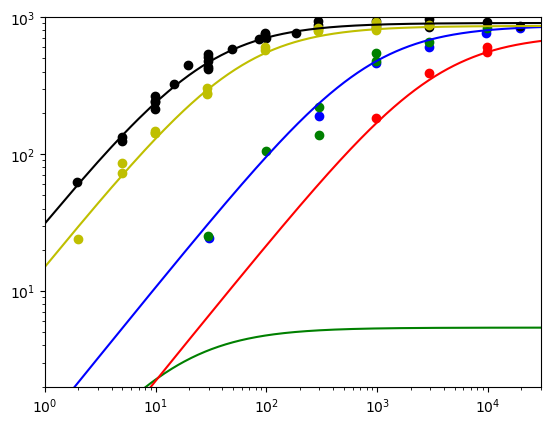

In [19]:
for color in np.unique(schief2_df['color']):
    df_temp = schief2_df[schief2_df['color']==color]
    ADP_temp = np.unique(df_temp['ADP (uM)'])[0]
    P_temp = np.unique(df_temp['P (uM)'])[0]
    kcat_temp = schief_kcat(ADP_temp, P_temp, kcat00, KiiADP, KiiP, KiiADPP)
    KM_temp = schief_KM(ADP_temp, P_temp, KM00, KiADP, KiP, KiADPP, KiiADP, KiiP, KiiADPP)
    speed_temp = schief_speed(ATP_axis, ADP_temp, P_temp, d, kcat_temp, Keq, KM_temp)
    plt.plot(ATP_axis, speed_temp, color=color)
    plt.scatter(df_temp['ATP (uM)'], df_temp['Speed (nm/s)'], color=color)
plt.xscale('log')
plt.xlim(1,30000)
plt.yscale('log')
plt.ylim(2, 1000)

## Figure 4A

In [24]:
schief4A_df = schief_df[schief_df['fig']=='4A']
schief4A_df[schief4A_df['color']=='g']

,Unnamed: 0,ATP (uM),ADP (uM),P (uM),Speed (nm/s),fig,color
79,0,10.0,0.0,0.000000,237.410284,4A,g
80,1,10.0,0.0,4990.512334,192.462327,4A,g
81,2,10.0,0.0,9981.024668,147.883128,4A,g
82,3,10.0,0.0,9962.049336,142.693138,4A,g


(60, 1000)

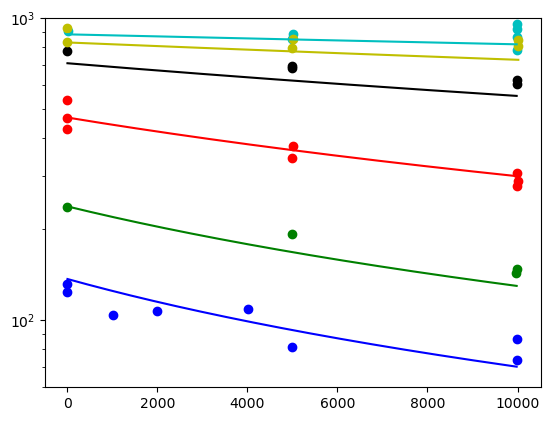

In [34]:
for color in np.unique(schief4A_df['color']):
    df_temp = schief4A_df[schief4A_df['color']==color]
    ADP_temp = np.unique(df_temp['ADP (uM)'])[0]
    ATP_temp = np.unique(df_temp['ATP (uM)'])[0]
    P_temp = np.arange(int(np.max(df_temp['P (uM)']))+1)
    kcat_temp = schief_kcat(ADP_temp, P_temp, kcat00, KiiADP, KiiP, KiiADPP)
    KM_temp = schief_KM(ADP_temp, P_temp, KM00, KiADP, KiP, KiADPP, KiiADP, KiiP, KiiADPP)
    speed_temp = schief_speed(ATP_temp, ADP_temp, P_temp, d, kcat_temp, Keq, KM_temp)
    plt.plot(P_temp, speed_temp, color=color)
    plt.scatter(df_temp['P (uM)'], df_temp['Speed (nm/s)'], color=color)

#plt.xlim(1,30000)
plt.yscale('log')
plt.ylim(60, 1000)

## Figure 4B

In [35]:
schief4B_df = schief_df[schief_df['fig']=='4B']
schief4B_df[schief4B_df['color']=='g']

,Unnamed: 0,ATP (uM),ADP (uM),P (uM),Speed (nm/s),fig,color
114,0,1000.0,194.174757,0.0,724.754721,4B,g
115,1,1000.0,485.436893,0.0,557.361282,4B,g
116,2,1000.0,592.233010,0.0,547.182943,4B,g
117,3,1000.0,990.291262,0.0,461.642262,4B,g
118,4,1000.0,2000.000000,0.0,365.884533,4B,g
119,5,1000.0,2000.000000,0.0,327.425531,4B,g
120,6,1000.0,2000.000000,0.0,296.281258,4B,g
121,7,1000.0,5000.000000,0.0,179.481336,4B,g


(100, 1000)

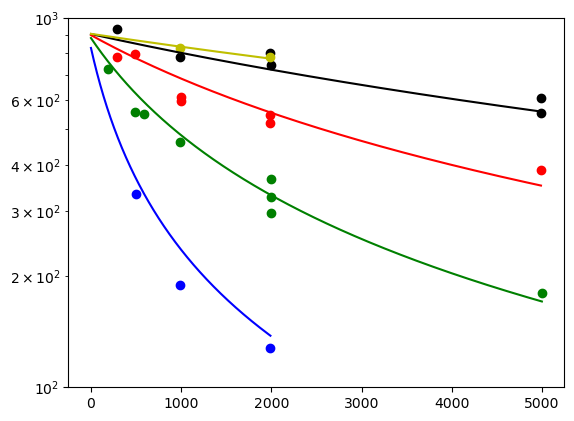

In [37]:
for color in np.unique(schief4B_df['color']):
    df_temp = schief4B_df[schief4B_df['color']==color]
    P_temp = np.unique(df_temp['P (uM)'])[0]
    ATP_temp = np.unique(df_temp['ATP (uM)'])[0]
    ADP_temp = np.arange(int(np.max(df_temp['ADP (uM)']))+1)
    kcat_temp = schief_kcat(ADP_temp, P_temp, kcat00, KiiADP, KiiP, KiiADPP)
    KM_temp = schief_KM(ADP_temp, P_temp, KM00, KiADP, KiP, KiADPP, KiiADP, KiiP, KiiADPP)
    speed_temp = schief_speed(ATP_temp, ADP_temp, P_temp, d, kcat_temp, Keq, KM_temp)
    plt.plot(ADP_temp, speed_temp, color=color)
    plt.scatter(df_temp['ADP (uM)'], df_temp['Speed (nm/s)'], color=color)

#plt.xlim(1,30000)
plt.yscale('log')
plt.ylim(100, 1000)